# Знакомство с данными


В рамках этой недели мы будем работать с данными от компании **Kiva**, занимающейся кредитованием.

Kiva - это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva - **Make a loan, change a life**

<img src="https://images.squarespace-cdn.com/content/v1/55cbb6d4e4b0f9228ad80414/1627389431192-6ZSA98VO5MQY857ONCEI/Kiva+US+Product+Grid.jpg?format=2500w" width="600" height="500" />  
Источник: [официальный сайт Kiva](https://www.kiva.org/about)

### Структура работы
Команда Kiva наняла нас, чтобы посмотреть, нет ли аномалий в их данных. Также от нас ожидают, что мы дадим рекомендации, что можно исправить в работе компании для того, чтобы увеличить эффективность привлечения и распределения средств.

Для того, чтобы сделать это и донести наши мысли заказчику, необходимо сделать большое количество визуализаций, чтобы наглядно показать полученные результаты.

Для этого и нужно в улучшить навыки владения инструментами визуализации данных - чтобы лучше понимать закономерности в данных и наглядно показывать полученные результаты.

В рамках этой недели нам предстоит:
- Вспомнить основы визуализации данных
- Познакомиться с принципами проведения Разведочного анализа данных (EDA, Exploratory data analysis)
- Познакомиться с основами продвинутой визуализации данных
- Научиться использовать самые распростаненные способы поиска аномалий

### Структура данных
**kiva_loans** - это набор данных, который содержит большую часть информации о займах:
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом заемщику (USD)
- sector - Сектор использования займа
- activity - Более гранулированная категория
- use - Назначение использования суммы кредита
- country - Полное название страны, в которой был выдан кредит
- term_in_months - Срок, на который был выдан кредит в месяцах
- lender_count - Общее количество кредиторов, которые внесли свой вклад в этот кредит
- loaner_genders - Разделенные запятыми буквы M, F, где каждый экземпляр представляет одного мужчину / женщину в группе

**kiva_mpi_region_locations** - набор данных, содержащий данные о регинах и показатели MPI:
(Global Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше бедность в соответствующем регионе
- country - страна
- region - регион в стране
- world_region - часть света
- MPI - многомерный индекс бедности
- geo - координаты (широта, долгота)



# 1. Импорт данных, повторение основных видов визуализации данных

## 1.1 Импорт библиотек, первое знакомство с данными

В рамках этой недели мы будем использовать несколько сторонных библиотек:
- `datetime` - модуль работы с данными и временем (подробнее мы рассмотрим его во второй неделе).
- `matplotlib` - базовая библиотека для визуализации на Python.
- `numpy` - библиотека работы с векторами и матрицами, которая дает доступ к большом количеству операций и функций.
- `math` - библиотека с продвинутыми математическими операциями.
- `missingno` - библиотека детекции и манипуляции пропущенными значениями
- `seaborn` - библиотека продвинутой визуализации, имеет полную совместимость с matplotlib и по сути является ее продвинутым братом.
- `os` - библиотека работы с операционной системой прямо внутри Python. Нужна в нашем случае для манипуляции с папками и файлами.


In [ ]:
# Импортируем все библиотеки, которые будем использовать в рамках работы
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import missingno as msno
import seaborn as sns
import os

%matplotlib inline
palette = plt.get_cmap('Set2')

In [ ]:
# Импортируем данные
kiva_loans = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/kiva_loans.csv', index_col=0)
mpi = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/kiva_mpi_region_locations.csv')

Посмотрим на внешний вид данных

In [ ]:
kiva_loans.head(5)

,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,term_in_months,lender_count,borrower_genders
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,12.0,12,female
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,11.0,14,"female, female"
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,43.0,6,female
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,11.0,8,female
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,14.0,16,female


Просто взглянув на данные, мы видим, что:
- В нашем распоряжении достаточно большое количество информации о размере займа; сфере и цели, на которую выделяется займ; стране, валюте и даже сроке, на который этот займ выдается
- Мы можем посмотреть на тип данных каждой переменной. Например, в переменной `borrower_genders` указаны текстовые данные, но, например, во второй строчке указано "female, female". То есть переменная возможно небинарная?
- Видим, что судя по всем заемщики обычно возращают ту же сумму, что и заняли.

В зависимости от конкретных целей, даже из 5-ти первых строчек датасета можно вынести много информации.

## 1.2 Основные типы визуализации данных

Ниже мы реализуем следующие типы графиков:



### **Гистограмма (Hist plot)**  
Гистограмма (или Histogram plot) представляет собой графическое изображение распределения данных по определенным интервалам (бинам) на числовой шкале. Главная цель гистограммы - показать, как часто значения попадают в каждый из заданных интервалов. Этот тип графика позволяет легко оценить форму и характер распределения данных..

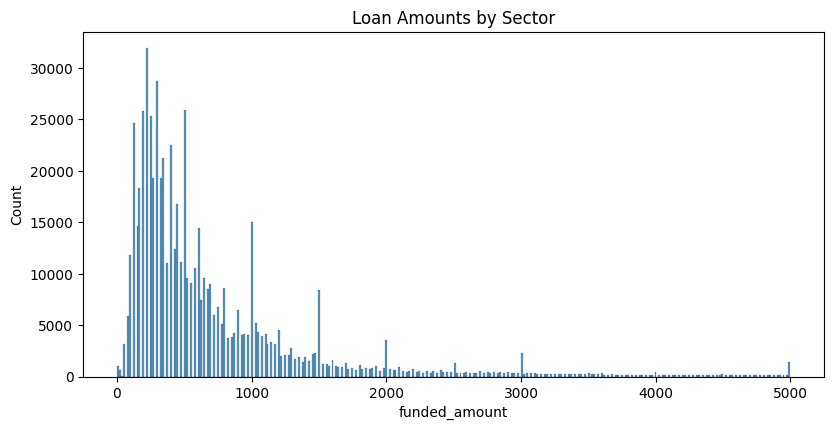

In [ ]:
# Самые распространенные графики
plt.figure(figsize=(16, 8))

# Hist Plot
plt.subplot(2, 2, 1)
sns.histplot(x='funded_amount', data=kiva_loans[kiva_loans['funded_amount'] <= 5000])
plt.title('Loan Amounts by Sector')

plt.tight_layout()
plt.show()

### **Ящик с усами (Box Plot)**  
Box plot (или "ящик с усами") представляет собой графическое изображение распределения данных. График включает в себя прямоугольный ящик, который представляет интерквартильный размах (расстояние между первым (25%) и третьим (75%) квартилями), а также "усы", которые выходят из ящика и показывают минимальное и максимальное значения данных, не считая выбросов.

Вот как можно интерпретировать график:

1. **Ящик**:
- Верхний край ящика – третий квартиль (Q3).
- Нижний край ящика – первый квартиль (Q1).
- Высота ящика – интерквартильный размах (IQR).
2. **Усы**:
- Верхний ус обычно продолжается до максимального значения в пределах 1.5 * IQR от Q3.
- Нижний ус обычно продолжается до минимального значения в пределах 1.5 * IQR от Q1.
3. **Выбросы**:
- Точки за пределами усов могут считаться выбросами, что указывает на наличие необычных или экстремальных значений.

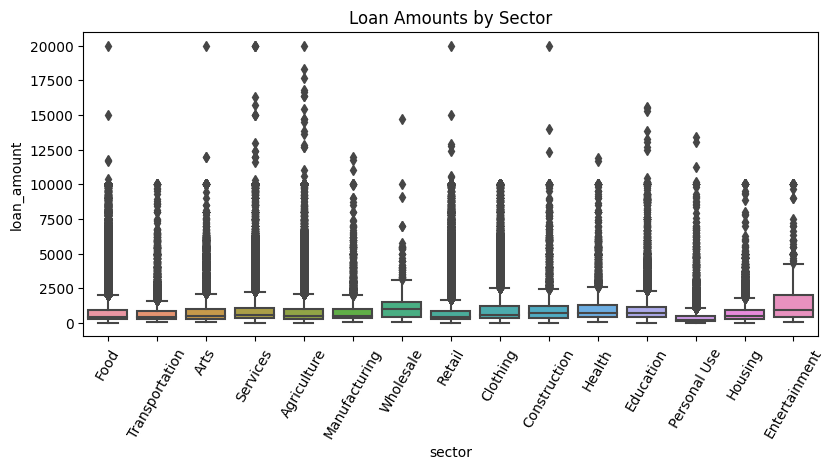

In [ ]:
# Самые распространенные графики
plt.figure(figsize=(16, 8))

# Box plot
plt.subplot(2, 2, 2)
sns.boxplot(x='sector', y='loan_amount', data=kiva_loans[kiva_loans['loan_amount'] <= 20000])
plt.xticks(rotation=60)
plt.title('Loan Amounts by Sector')

plt.tight_layout()
plt.show()

### **График количества (Count Plot)**  
График количества – это столбцовый график, отражающий количество наблюдений для каждой уникальной категории. Используется для изучения распределения категориальных переменных.

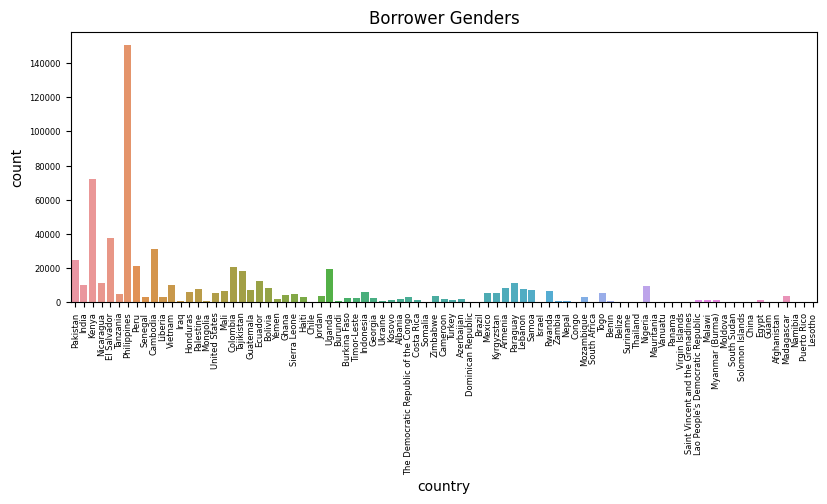

In [ ]:
# Самые распространенные графики
plt.figure(figsize=(16, 8))

# Count plot
plt.subplot(2, 2, 3)
sns.countplot(x='country', data=kiva_loans)
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.title('Borrower Genders')

plt.tight_layout()
plt.show()

### **Точечная диаграмма (Scatter Plot)**

Точечная диаграмма – это график, отображающий отдельные точки данных в двумерном пространстве. Помогает выявить взаимосвязи и корреляции между двумя переменными.

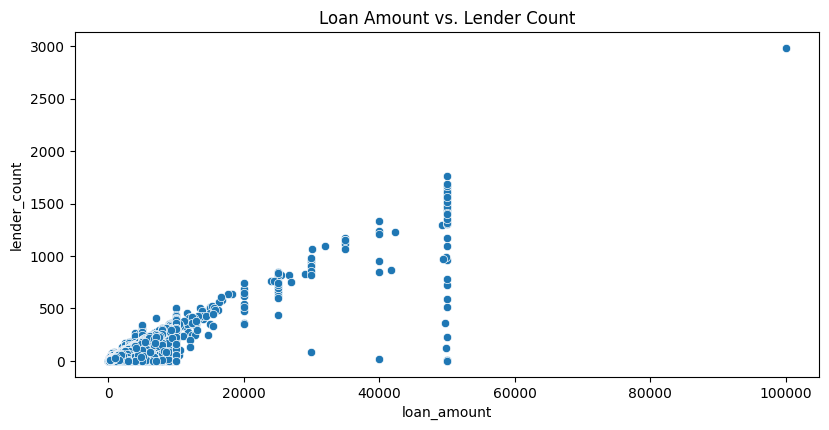

In [ ]:
# Самые распространенные графики
plt.figure(figsize=(16, 8))

# Scatter plot
plt.subplot(2, 2, 4)
sns.scatterplot(x='loan_amount', y='lender_count', data=kiva_loans)
plt.title('Loan Amount vs. Lender Count')

plt.tight_layout()
plt.show()

Есть еще несколько достаточно распространенных типов графиков, которые не удастся получить используя эти данные (самый известный из них - *sns.lineplot()* )

**Линейный график (Line Plot):**  
Линейный график – визуализация данных в виде линии на координатной плоскости, представляющей тренды и изменения между двумя переменными. Часто используется для отображения временных рядов и выявления вариаций в данных.


Для того чтобы больше о том, как реализовывать другие типы графиков, используйте официальную документацию [Matplotlib](https://matplotlib.org/stable/plot_types/index.html) и [Seaborn](https://seaborn.pydata.org/examples/index.html)

# 2. Разведочный анализ данных (EDA)

**Разведочный анализ данных (EDA):**  
Разведочный анализ данных – это этап в анализе данных, направленный на первичное исследование и понимание характеристик набора данных. Он включает в себя использование графиков, статистики и визуализации для выявления паттернов, выбросов и особенностей данных. EDA выявляет потенциальные направления для более глубокого анализа на начальном этапе исследования данных и является важным инструментом для выявления закономерностей и формулирования гипотез.

## 2.1 Работа с пропущенными значениями
Давайте посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе (например, в итоге неправильно обучится модель или нельзя будет использовать датасет в работе). Это можно сделать с помощью нескольких функций из библиотеки **missingno**.

<Axes: >

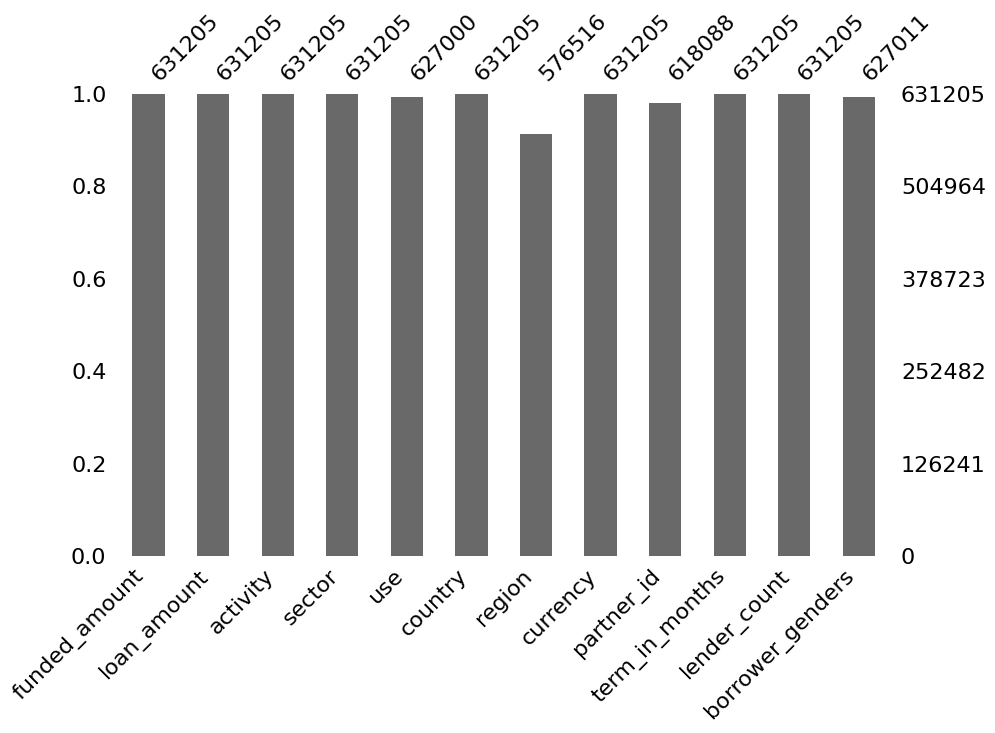

In [ ]:
msno.bar(kiva_loans, figsize=(10, 6))

Мы видим, что больше всего пропусков находится в столбце **region**, однако в целом датасет "чистый" - пропуски составляют незначительную долю от общего количества наблюдений (больше 90% наблюдений заполнено).
Распознать в каком месте датасета наибольшее количество пропусков можно с помощью функции **msno.matrix()**

<Axes: >

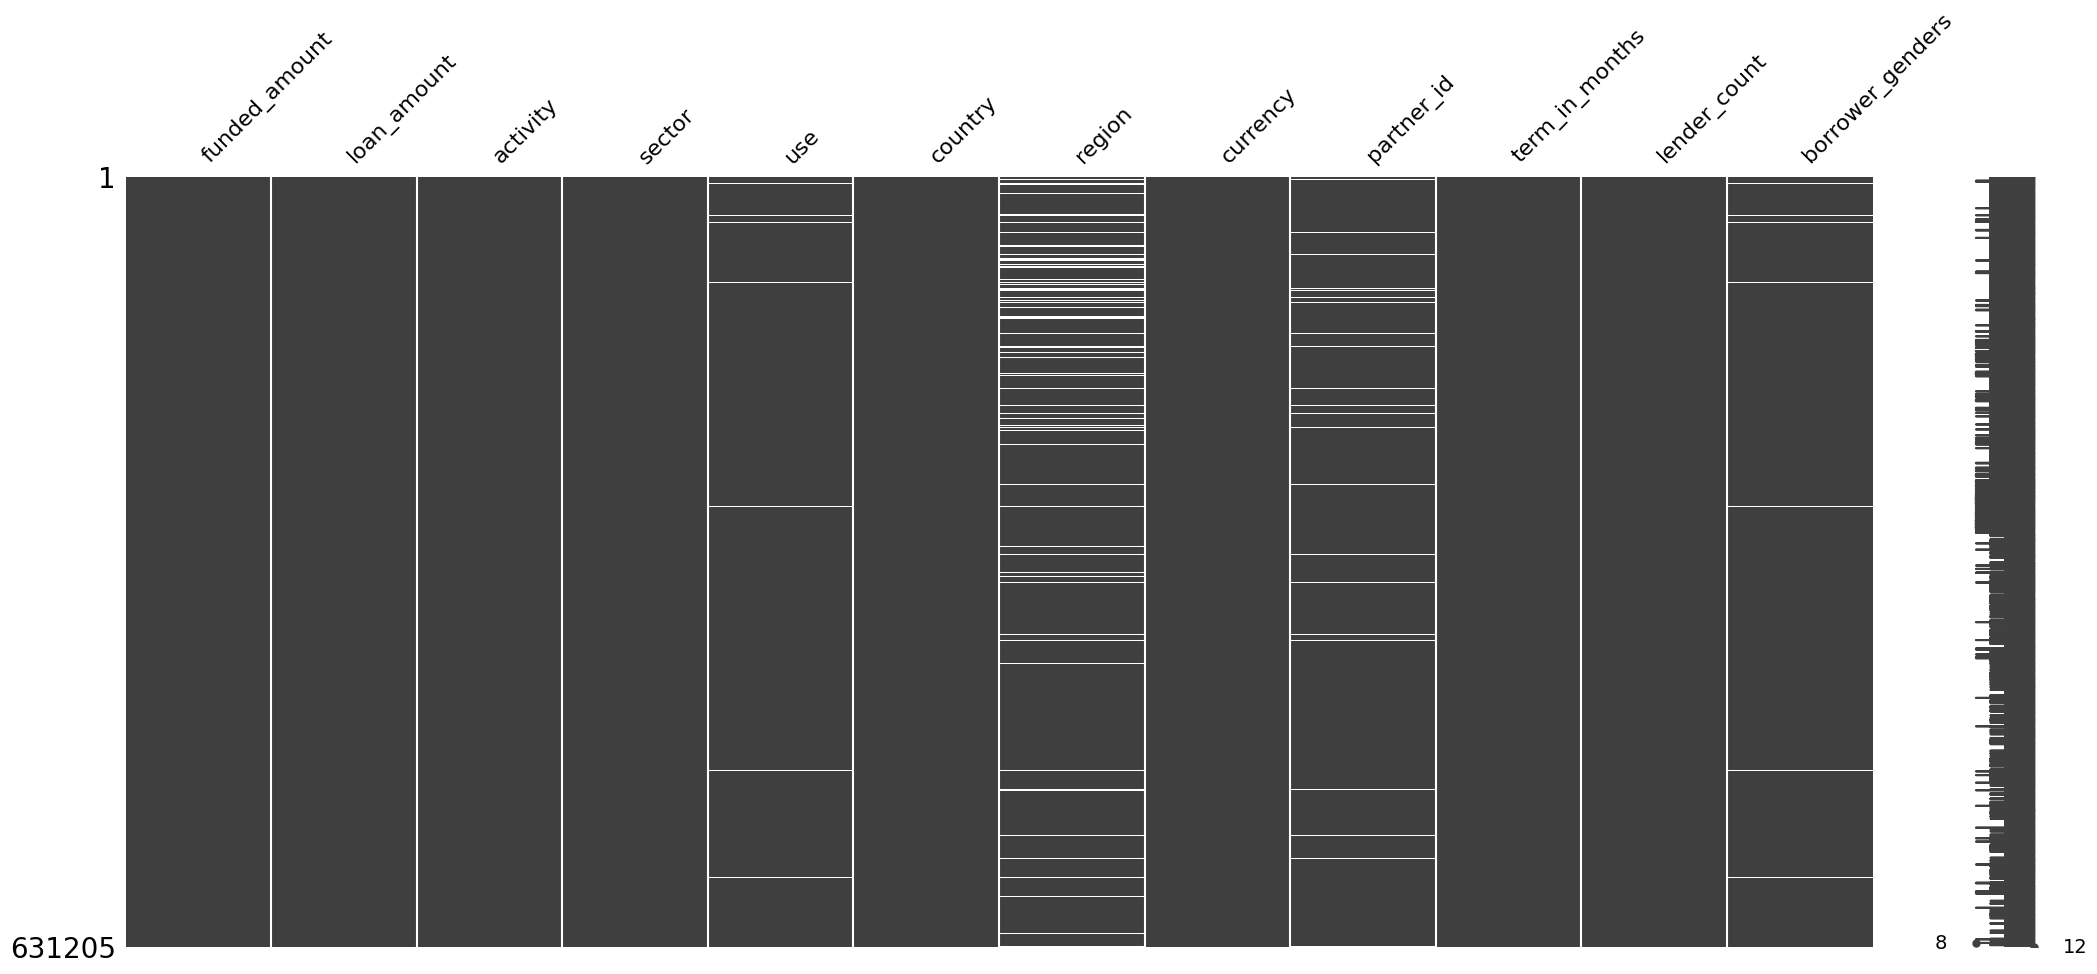

In [ ]:
msno.matrix(kiva_loans)

Белыми прочерками в данном случае помечены пропуски в данных. Данные отсортированы по индексу - то есть по порядку в датасете.

Как работать с пропусками данных, вы ранее говорили на курсе по Математике и алгоритмам машинного обучения.

Пример очень "грязного" датасета с большим количеством пропусков можно найти [здесь](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data#). В качестве закрепления, скачайте этот датасет и попробуйте проанализировать количество пропусков в нём.

## 2.2 Использование описательных статистик
Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них. Это нужно для того, чтобы понять, к какому типу относится каждая переменная. В свою очередь, это нужно для того, чтобы лучше понимать как проводить анализ.

С помощью атрибута .dtypes можно узнать какого типа данные в нашем датасете

In [ ]:
kiva_loans.dtypes

funded_amount       float64
loan_amount         float64
activity             object
sector               object
use                  object
country              object
region               object
currency             object
partner_id          float64
term_in_months      float64
lender_count          int64
borrower_genders     object
dtype: object

Основные описательные статистики о датасете можно получить с помощью метода **.describe()**

In [ ]:
kiva_loans.describe()

,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,631205.000000,631205.000000,618088.000000,631205.000000,631205.000000
mean,797.841533,847.172789,177.147155,13.756108,21.044924
std,1135.536644,1198.432164,93.219670,8.708560,28.642236
min,0.000000,25.000000,9.000000,1.000000,0.000000
25%,250.000000,275.000000,126.000000,8.000000,7.000000
50%,475.000000,500.000000,145.000000,13.000000,13.000000
75%,900.000000,1000.000000,204.000000,14.000000,25.000000
max,100000.000000,100000.000000,526.000000,158.000000,2986.000000


Если нас интересуют только переменные определенного типа (например, *object* или *np.float64*), то при использовании метода нужно задать параметр **include**.

In [ ]:
kiva_loans.describe(include=[np.float64])

,funded_amount,loan_amount,partner_id,term_in_months
count,631205.000000,631205.000000,618088.000000,631205.000000
mean,797.841533,847.172789,177.147155,13.756108
std,1135.536644,1198.432164,93.219670,8.708560
min,0.000000,25.000000,9.000000,1.000000
25%,250.000000,275.000000,126.000000,8.000000
50%,475.000000,500.000000,145.000000,13.000000
75%,900.000000,1000.000000,204.000000,14.000000
max,100000.000000,100000.000000,526.000000,158.000000


In [ ]:
kiva_loans.describe(include=[object])


,activity,sector,use,country,region,currency,borrower_genders
count,631205,631205,627000,631205,576516,631205,627011
unique,163,15,401931,85,12351,67,10982
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,Philippines,Kaduna,PHP,female
freq,67115,168453,4640,150638,9254,150637,400154


**Первые результаты и выводы, которые мы получили по итогам проведенного анализа**
* В этом датасете содержатся данные о **85** странах, где люди запрашивали помощь на финансирование проектов (рисунок 1, [https://drive.google.com/file/d/1DVPOpsNKRwfcqpPlr2uZ1hlGxlEFahEJ/view?usp=sharing]).
* Страной с самым большим количеством займов являются **Филиппины** (рисунок 2, [https://drive.google.com/file/d/1kw5DJvbf0G0iABHhRpYfdw8NwNvMU4Vs/view?usp=sharing]).
* Наиболее популярной категорией является **Сельское хозяйство** (рисунок 3, [https://drive.google.com/file/d/14Q3A6y6Gf61bKpe0fsXpfGL5c3FyZGga/view?usp=sharing]).
* Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита (рисунок 4, [https://drive.google.com/file/d/1VRIQfbhYkVzHeZmL1vF8vkolekALeQDF/view?usp=sharing]).
* В этом наборе данных **10982** разных значений для пола! (рисунок 5, [https://drive.google.com/file/d/1cC2QaIfmhm4tvvlcSDm6tZgupao_IGql/view?usp=sharing]) Очевидно, что это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений. Помним, что для качественной аналитики очень важно понимать анализируемый продукт. Поэтому ответ на этот вопрос очень важен.
* Среднее финансирование в мире составляет **797** долларов, а медианное финансирование - **475** долларов (рисунок 6, [https://drive.google.com/file/d/1fK7h8H8xVRd3TjIH_Wz8UsBLV32l6cxX/view?usp=sharing]). Возможно это означает, что есть небольшая доля заявок с крупными суммами. То есть возможно необходимо будет поработать с выбросами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.


## 2.3 Функции фильтрации и группировка в рамках разведочного анализа данных

Для того, чтобы получить наиболее (статистически) значимые результаты, необходимо думать о том, чтобы используемые нами данные "не шумели" - не было большого количества ненужных значений, мешающих делать осмысленные выводы.

В рамках нашего анализа оставим только записи, которые происходят из стран, составляющих не менее 1% сообщества Kiva. Сгруппируем полученные результаты по странам.

In [ ]:
kiva_loans['country'].value_counts()

Philippines       150638
Kenya              72192
El Salvador        37897
Cambodia           31191
Pakistan           24910
                   ...  
Vanuatu                4
Afghanistan            2
Virgin Islands         2
Guam                   1
Mauritania             1
Name: country, Length: 85, dtype: int64

In [ ]:
countries = kiva_loans['country'].value_counts()[kiva_loans['country'].value_counts(normalize=True)>=0.01]
list_countries = list(countries.index)

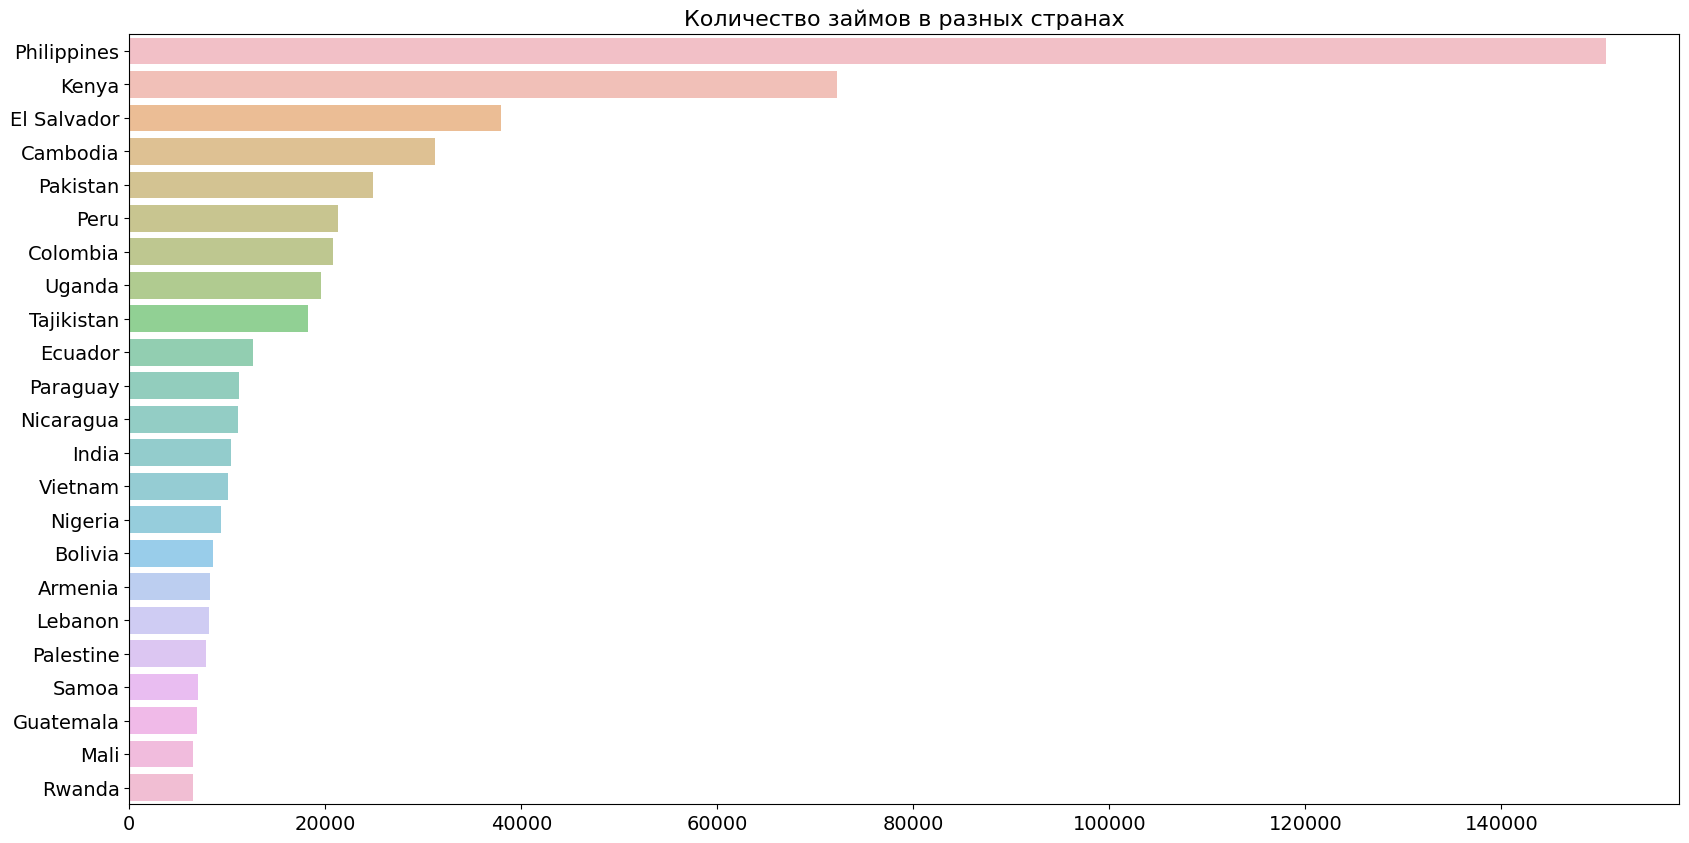

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разных странах", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов?**

Чуть менее четверти всех займов приходится на Филиппины

Возможно, потому что там широко распространены краткосрочные и небольшие займы.
Давайте запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия может оказаться наиболее эффективной для точечного и обширного финансирования в условиях бедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Но вообще ни одной из стран Европейского Союза или НАФТА.

Попробуем сгруппировать страны по частям света

Для этого воспользуемся файлом **kiva_mpi_region_locations**

Поскольку мы ранее не использовали наш второй датасет, давайте посмотрим его структуру, чтобы узнать каким образом нужно группировать этот датасет.

In [ ]:
mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


Поскольку для одной страны указано большое количество регионов, используем join для того чтобы вывести среднее по стране (а не по региону страны).

In [ ]:
mpi_grouped = mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()
mpi_grouped.head(10)

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
5,BEN,Benin,Sub-Saharan Africa,0.320333
6,BFA,Burkina Faso,Sub-Saharan Africa,0.547692
7,BGD,Bangladesh,South Asia,0.208286
8,BIH,Bosnia and Herzegovina,Europe and Central Asia,0.000000
9,BLZ,Belize,Latin America and Caribbean,0.020143


## 2.4 Объединение таблиц - использование join-функций при визуализации

In [ ]:
# Применим left-join для объединения двух таблиц
kiva_loans = kiva_loans.merge(mpi_grouped, how='left', on=['country'])
kiva_loans.head(5)

,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,term_in_months,lender_count,borrower_genders,ISO,world_region,MPI
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,12.0,12,female,PAK,South Asia,0.233167
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,11.0,14,"female, female",PAK,South Asia,0.233167
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,43.0,6,female,IND,South Asia,0.000000
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,11.0,8,female,PAK,South Asia,0.233167
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,14.0,16,female,PAK,South Asia,0.233167


In [ ]:
regions = kiva_loans['world_region'].value_counts()
regions_list = regions.index.to_list()

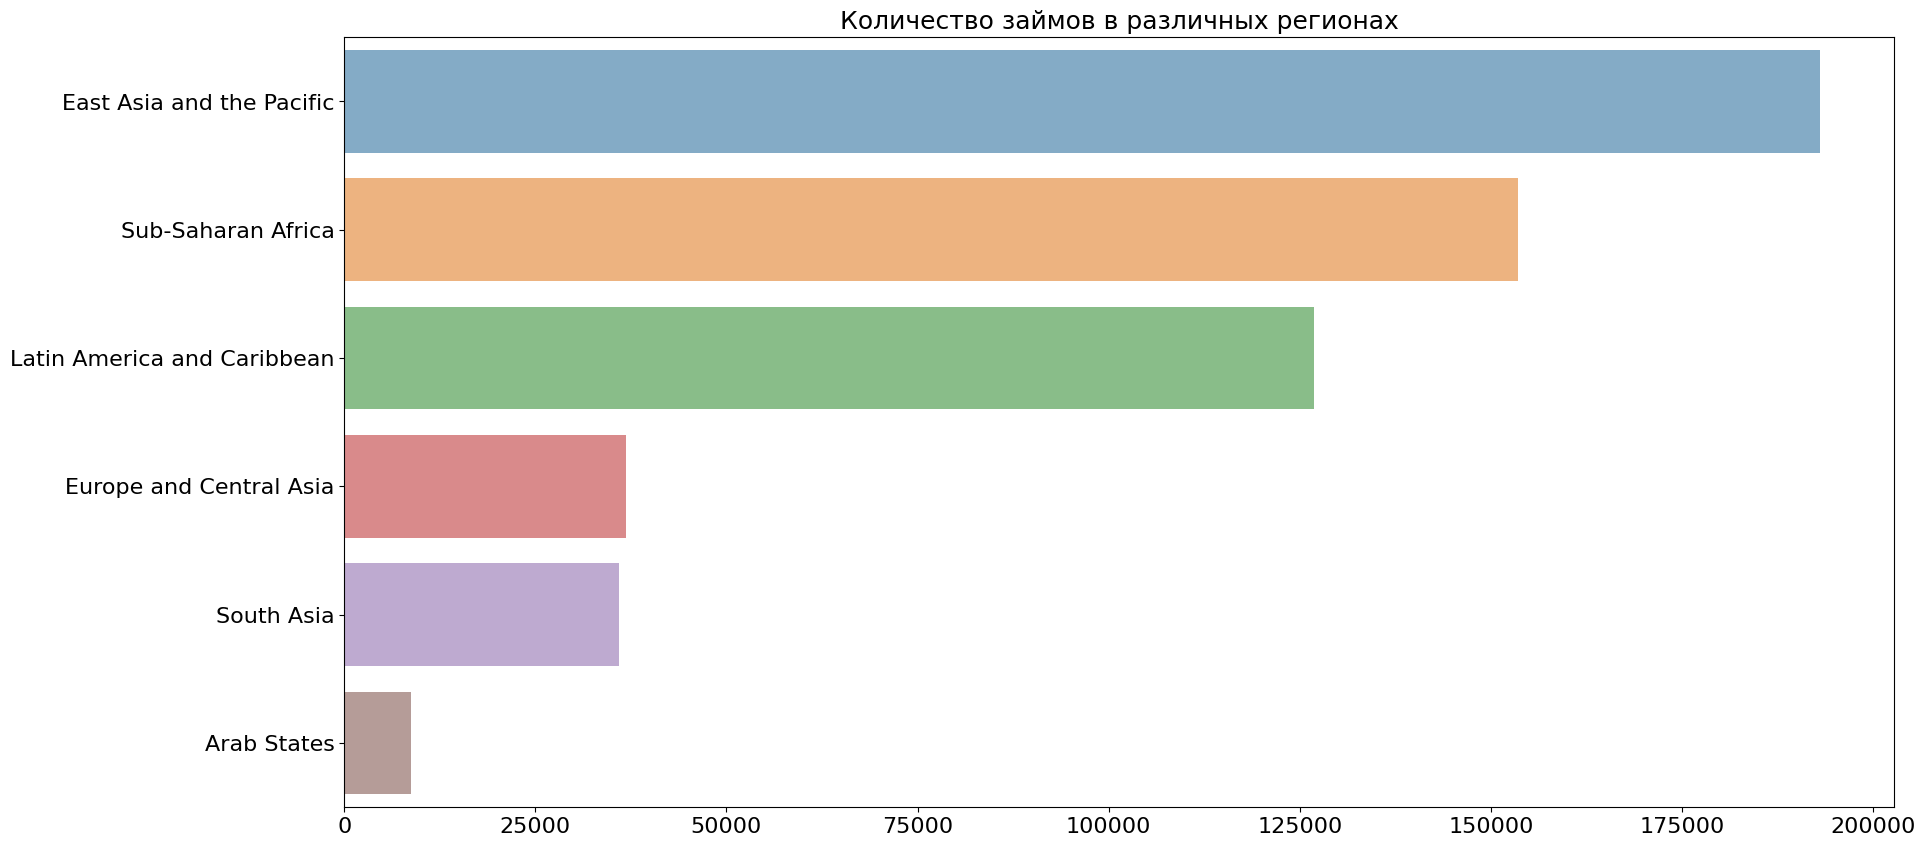

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title("Количество займов в различных регионах", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

После проведения подобного анализа становится очевидным наличие 3-х лидеров и 3-х аутсайдеров по количеству выданных займов.


Теперь перейдем к применению более продвинутых визуальных решений для применения в рамках Разведочного анализа данных.

# 3. Продвинутая визуализация данных и Разведовательный анализ данных (Exploratory data analysis, EDA)


## 3.1 Сравнение долей - используем круговые диаграммы

Какого пола люди обращаются за финансированием?

In [ ]:
kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                                          400154
male                                                                                                                                                                                                                                                                            127314
female, female                                                                                                                                                                                                                                                                   10993
female, female, female                                                                                                                                             

Во многих займах, заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Давайте использовать метку **group** для этих заемщиков на круговой диаграмме - случай, когда в рамках одного запроса обратилось несколько заёмщиков. Большинство таких групп - смешанные, то есть состоят из представителей обоих размеченных гендеров.

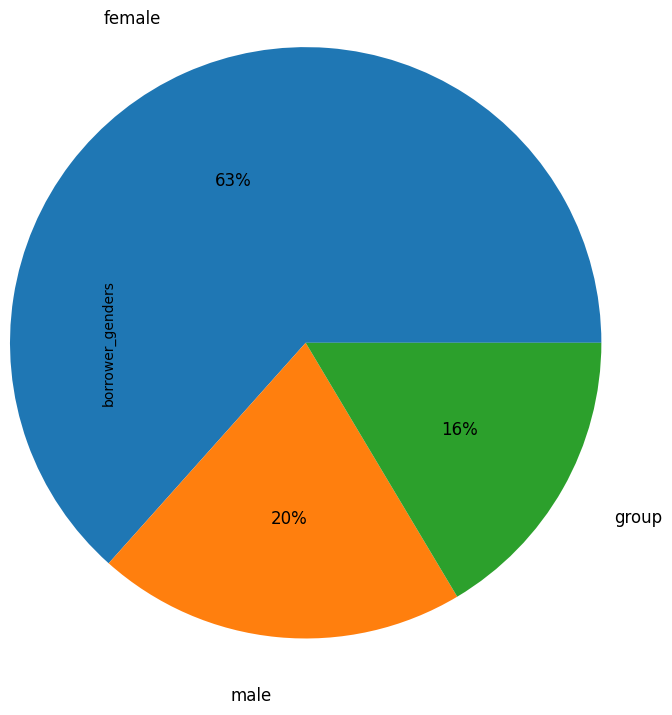

In [ ]:
kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in kiva_loans['borrower_genders'] ]

borrowers = kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=12, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заемщиков - женщины, и это весьма неожиданно.

**Подумайте, что это может означать?**



## 3.2 Сравнение долей - альтернативный способ

Для того чтобы сравнить доли, можно использовать и другой тип графика, который называется **horizontal bar plot**. Обычно этот график используется при более сложном анализе, когда нужно сравнить доли внутри большого количества групп. Давайте проведем подобный анализ, ответив на следующий вопрос:

**В каких странах подавляющее большинство заемщиков - женщины?**

In [ ]:
# 1. Проверяем есть ли страна в списке стран
# 2. Группируем по столбцам country, borrower_genders
# 3. Считаем количество наблюдений в каждой группе
# 4. Находим долю в процентах каждой группы в общей сумме
# 5. Заполним пропуски нулями
# 6. Оставляем только топ 20 значений по женщинам
# 7. Оставляем только интересующие нас значения

gender_by_country = kiva_loans[kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'], group_keys=False)['borrower_genders']\
    .count()\
    .groupby(level=0, group_keys=True).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

gender_by_country = gender_by_country[['female', 'male', 'group']]

In [ ]:
# 1. Проверяем есть ли страна в списке стран
# 2. Группируем по столбцам country, borrower_genders
# 3. Считаем количество наблюдений в каждой группе
# 4. Находим долю в процентах каждой группы в общей сумме
# 5. убираем группировку по borrower_genders
# 6. Заполним пропуски нулями
# 7. Оставляем только топ 20 значений по женщинам
# 8. Оставляем только интересующие нас значения

gender_by_country = kiva_loans[kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'], group_keys=False)['borrower_genders']\
    .count()\
    .groupby(level=0, group_keys=True).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

gender_by_country = gender_by_country[['female', 'male', 'group']]

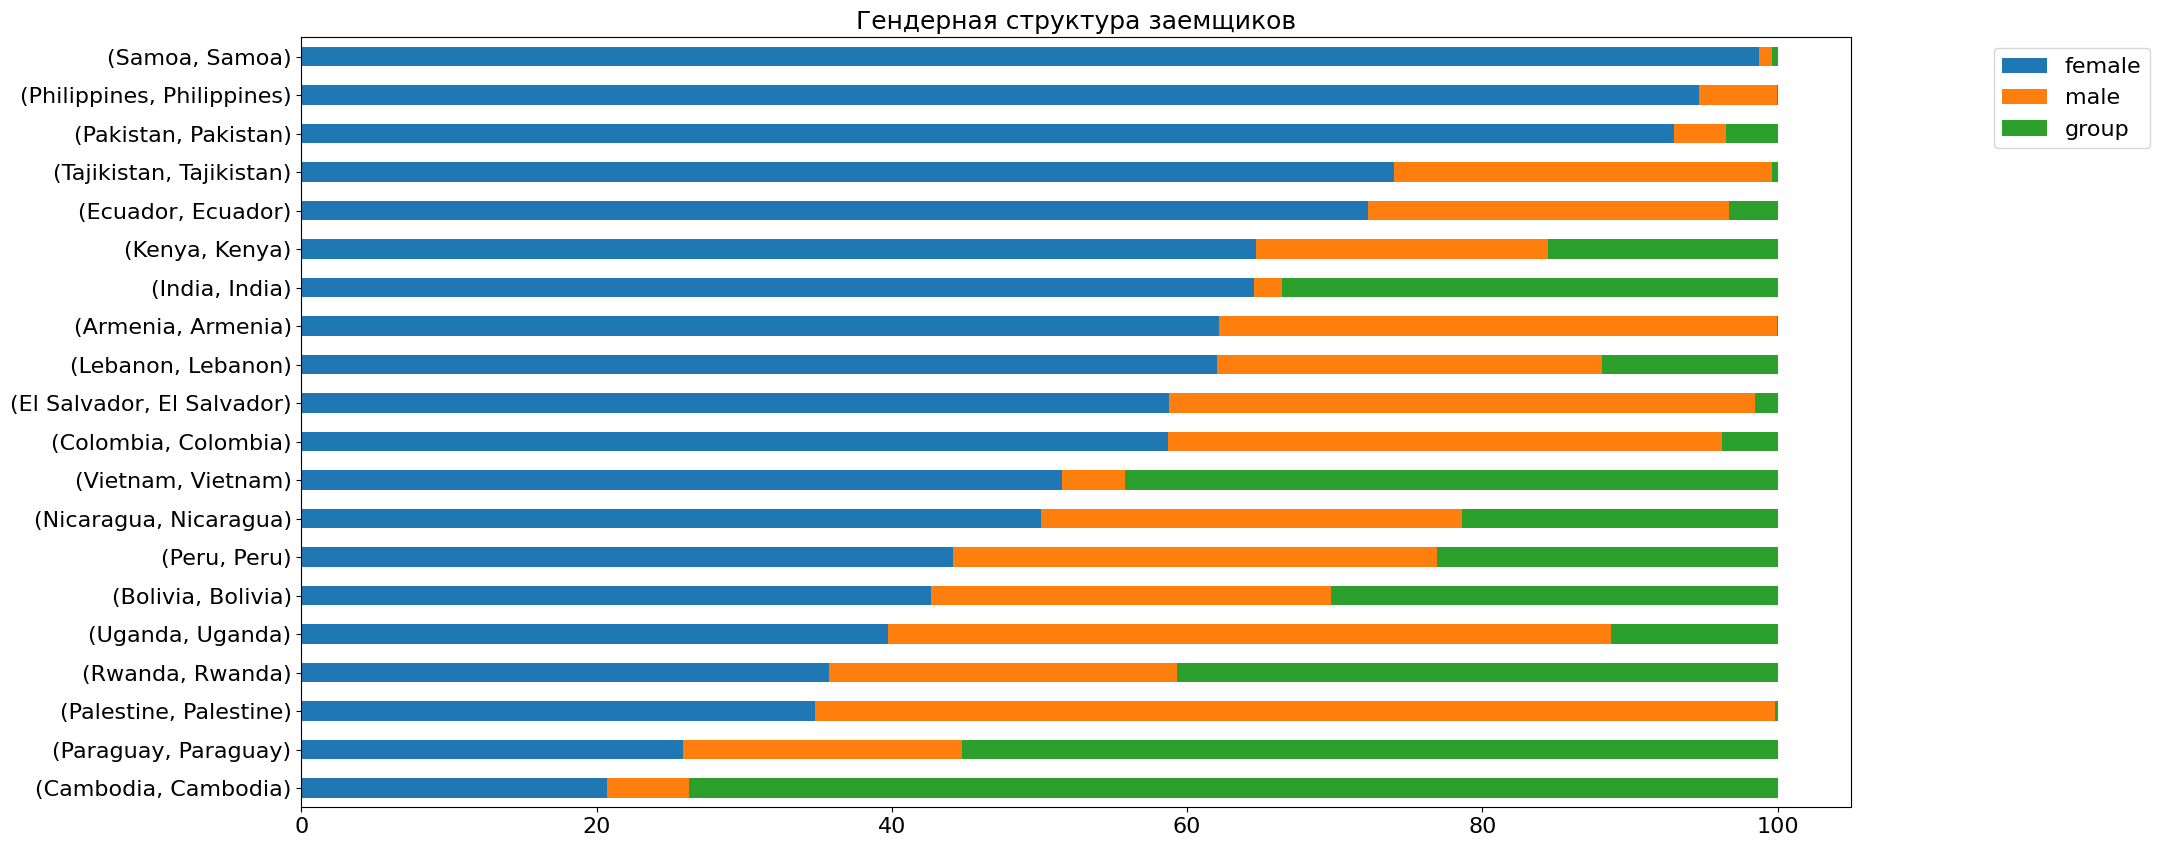

In [ ]:
plot = gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре разных стран?**

Например, в связи с направлениями традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран, где преобладающей религией является ислам, в которых женщине пока, к сожалению, отводится периферийная роль в принятии решений.

## 3.3 Работа с качественными характеристиками - создание панели из диаграмм

Допустим, мы хотим узнать ответ на следующий вопрос: "каковы наиболее популярные виды деятельности, под которые берут кредит у Kiva?"

Поскольку в имеющемся датасете целых две характеристики, отвечающих за род деятельности человека (**sector и activity**), у нас не получится сделать всего одну диаграмму. Заметим, что деятельность человека в датасете относится к одному из 15 секторов. В свою очередь каждый сектор также делится на несколько активностей. Таким образом, нам можно сделать панель из различных диаграм.

Для этого сгруппируем займы по признакам **sector, activity** и посмотрим на топ-10 в каждой группе.

In [ ]:
sectors = kiva_loans['sector'].value_counts()

In [ ]:
kiva_loans['activity'].value_counts()

Farming                      67115
General Store                61209
Personal Housing Expenses    30501
Food Production/Sales        26585
Agriculture                  25834
                             ...  
Film                            13
Personal Care Products           4
Event Planning                   2
Celebrations                     2
Adult Care                       1
Name: activity, Length: 163, dtype: int64

In [ ]:
sectors

Agriculture       168453
Food              129006
Retail            117846
Services           42583
Personal Use       33573
Housing            31730
Clothing           30995
Education          29527
Transportation     14729
Arts               11062
Health              8509
Construction        5920
Manufacturing       5889
Entertainment        781
Wholesale            602
Name: sector, dtype: int64

In [ ]:
loans_by_activity_sector = \
    kiva_loans[kiva_loans['sector'].isin(sectors[:9].index.values)]\
    .groupby(['sector', 'activity'])['loan_amount']\
    .count()\
    .reset_index()

In [ ]:
loans_by_activity_sector

,sector,activity,loan_amount
0,Agriculture,Agriculture,25834
1,Agriculture,Animal Sales,8850
2,Agriculture,Aquaculture,49
3,Agriculture,Beekeeping,23
4,Agriculture,Cattle,7236
...,...,...,...
124,Services,Water Distribution,552
125,Transportation,Motorcycle Transport,5575
126,Transportation,Rickshaw,2720
127,Transportation,Taxi,2501


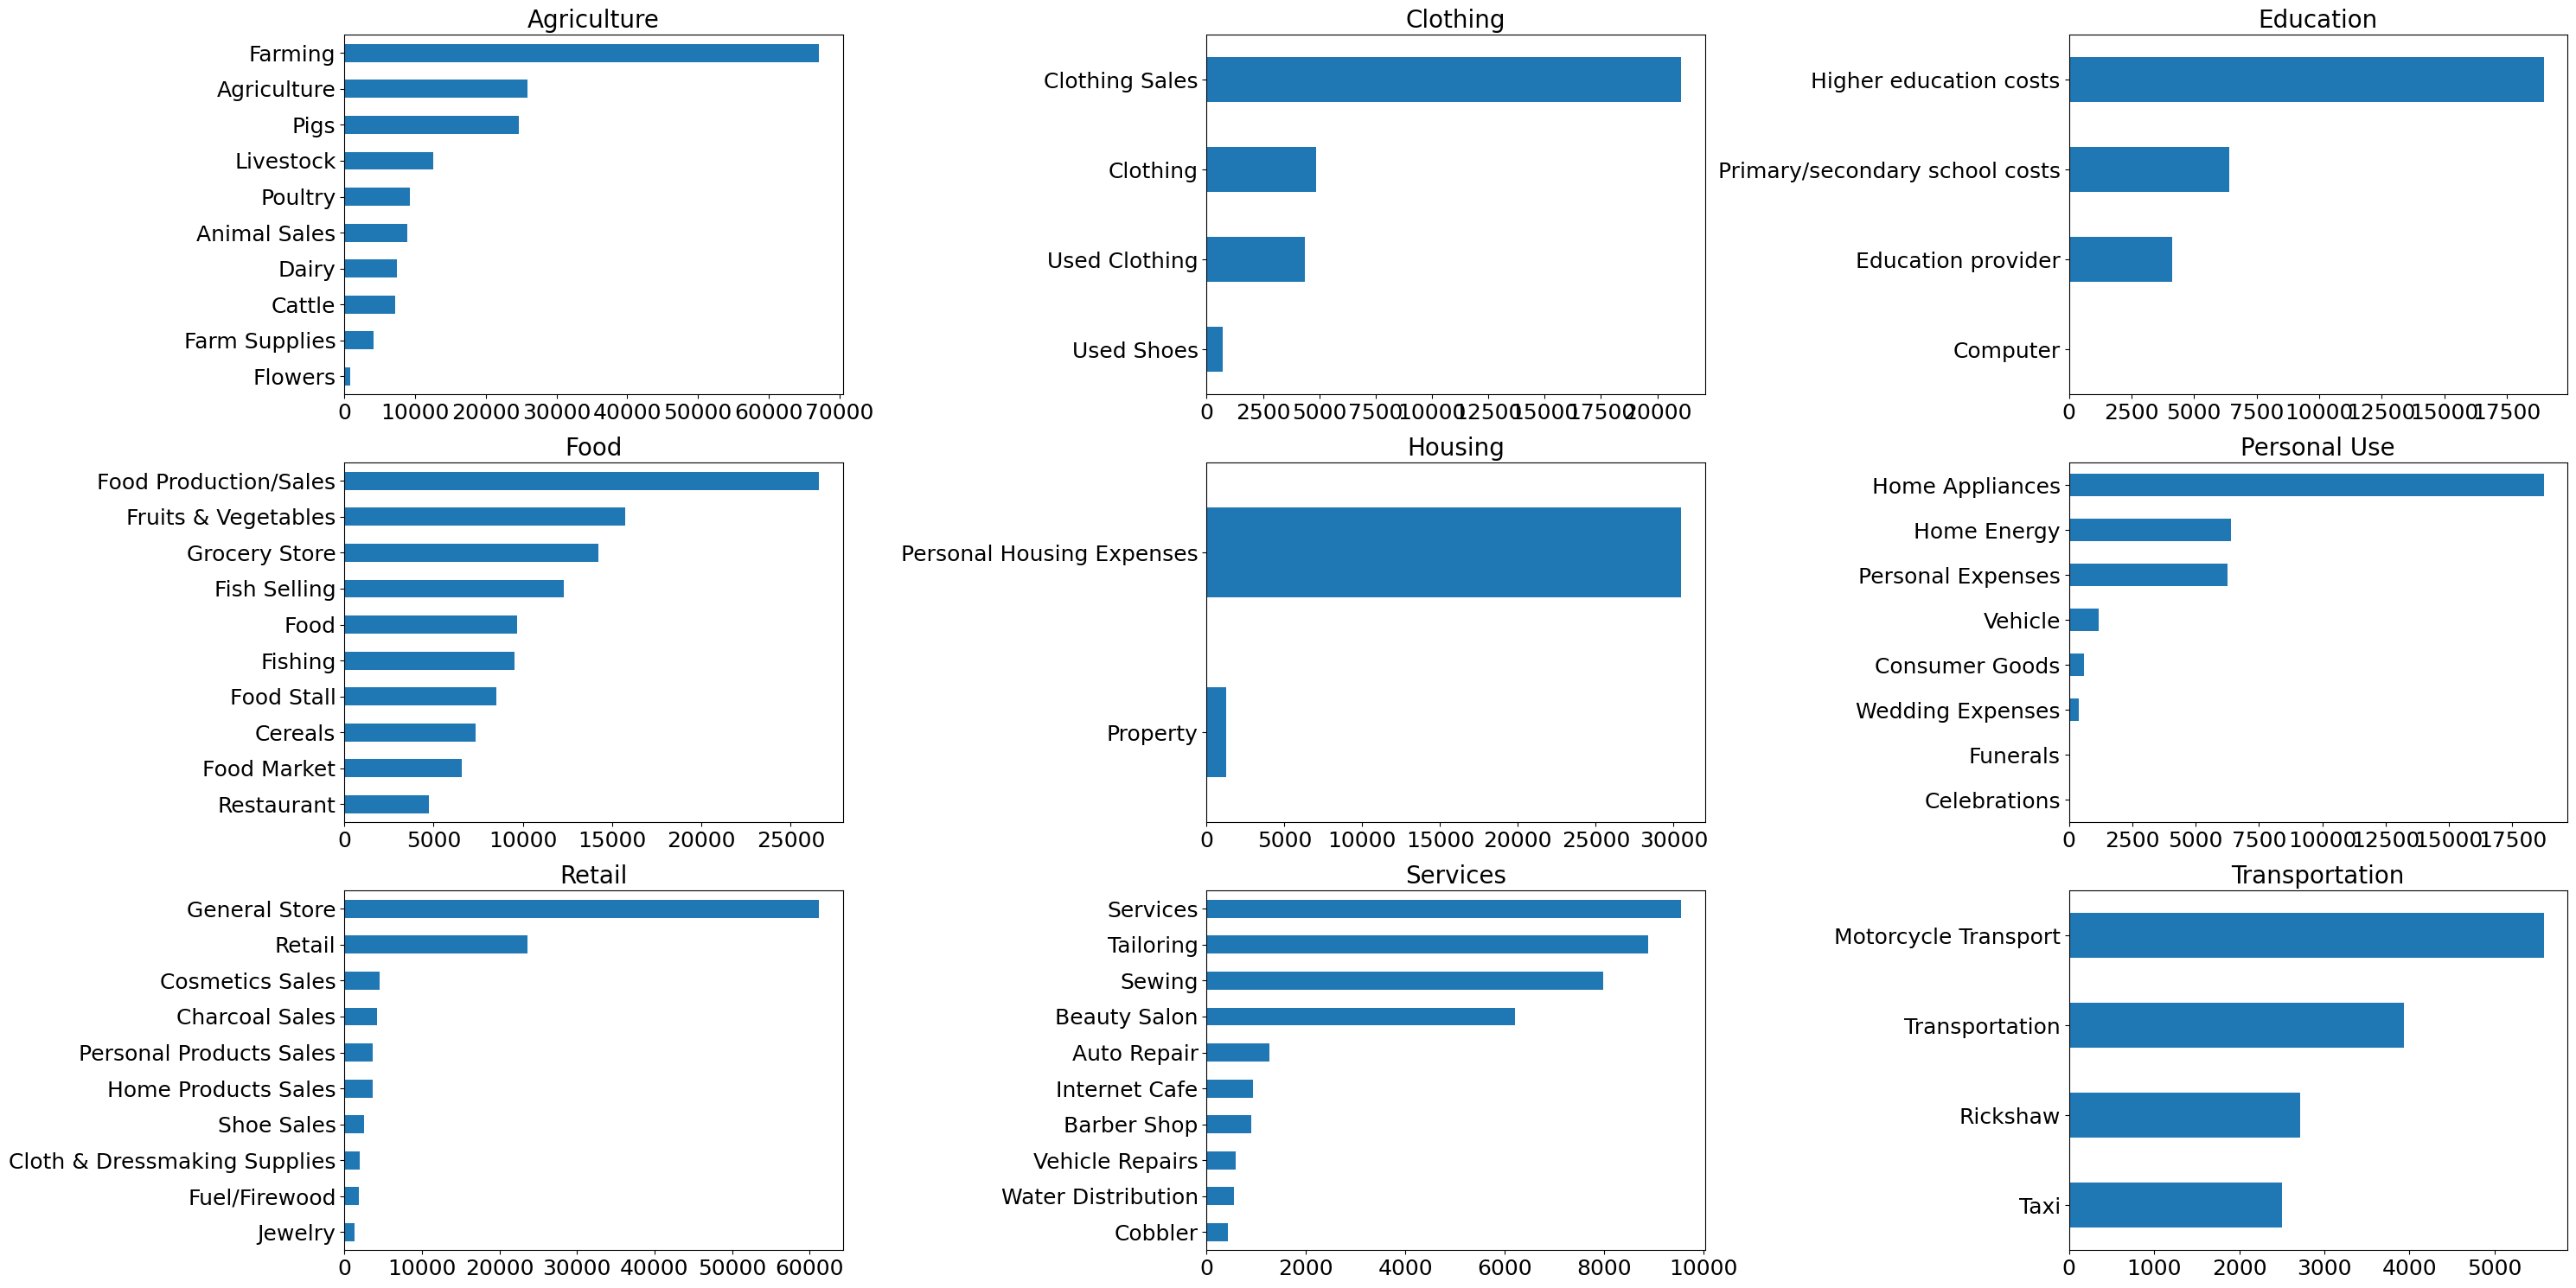

In [ ]:
# Создаем поле для графиков размером 3х3, все поле определяем размером 30 на 15
fig,axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))

for ax,q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
  # Для каждого из девяти графиков выбираем сектор
  # и внутри каждого сектора оставляем топ 10 самых популярных категорий (activities)
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')[-10:]
    # Определяем название каждого графика как название каждого сектора
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

Основной вывод, который мы можем сделать - львиная доля займов направлена на деятельность с невысокой добавленной стоимостью - Сельское Хозяйство, Розничная торговля, Сервис. То есть деятельность, в которой минимально задействованы смежные сектора экономики и невысок потенциал создания дополнительных рабочих мест и продуктов внутри страны, в отличие от, например, Производственных предприятий, Строительства, Ремесленных мастерских, Легкой промышленности.

И тем не менее, не может не радовать присутствие такого направления как, например, **Образование**: финансирование обучения школах и университетах, организация и подготовка курсов и образовательных программ.

## 3.4 Работа с выбросами - обнаружение аномалий в данных

Давайте посмотрим на график распределения сумм займов.

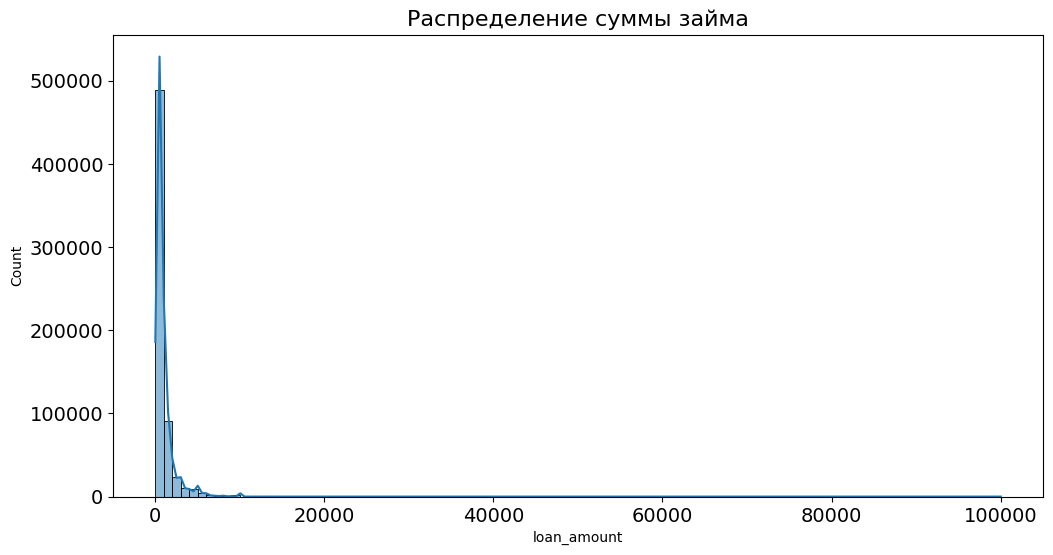

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(kiva_loans['loan_amount'], kde=True, bins = 100)
plt.show()

Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, и график не очень-то информативен в этой форме: нам нужно **усечь данные**, исключив выбросы из рассмотрения.




## 3.5 Работа с выбросами - удаление аномалий
Для того, чтобы отсечь выбросы воспользуемся правилом трех сигм.

**Правило трех сигм** – это статистический принцип, используемый для оценки разброса данных вокруг среднего значения в распределении. В соответствии с этим правилом, примерно 68% данных находятся в пределах одной стандартной девиации от среднего, 95% – в пределах двух стандартных девиаций, а 99.7% – в пределах трех стандартных девиаций. Таким образом, правило трех сигм позволяет оценить, насколько данные сосредоточены вокруг среднего значения и какой разброс они имеют.

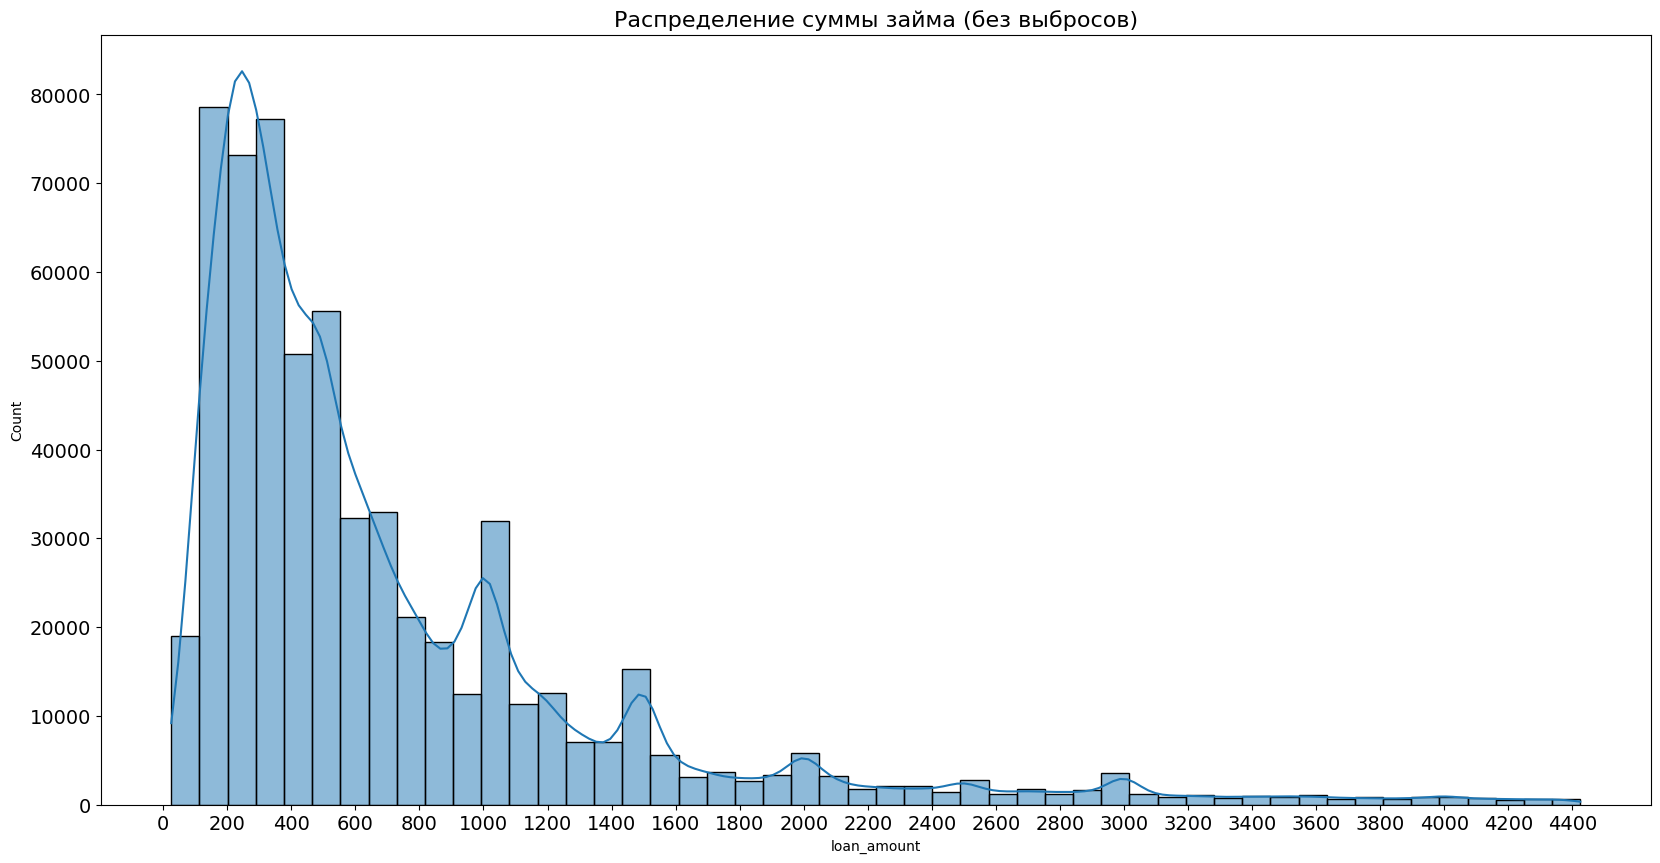

In [ ]:
# Наблюдаемое отклонение от среднего
dev = (kiva_loans['loan_amount']-kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
kiva_loans_trimmed = kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(kiva_loans_trimmed['loan_amount']+1), 200))

sns.histplot(kiva_loans_trimmed['loan_amount'], kde=True, bins = 50)
plt.show()

Теперь явно намного лучше!

* Большинство ссуд составляют от 100 до 600\$ с пиковыми значения в районе 200\$ и 400\$.
* Сумма естественно уменьшается, но мы можем заметить наличие еще нескольких пиков в 1000\$ (наиболее четкий), 1500\$ и 2000\$.

Примененный нами метод можно использовать и в более комплексных случаях.

У нас есть информация о сумме кредита в целом, давайте теперь посмотрим разбиение по секторам:

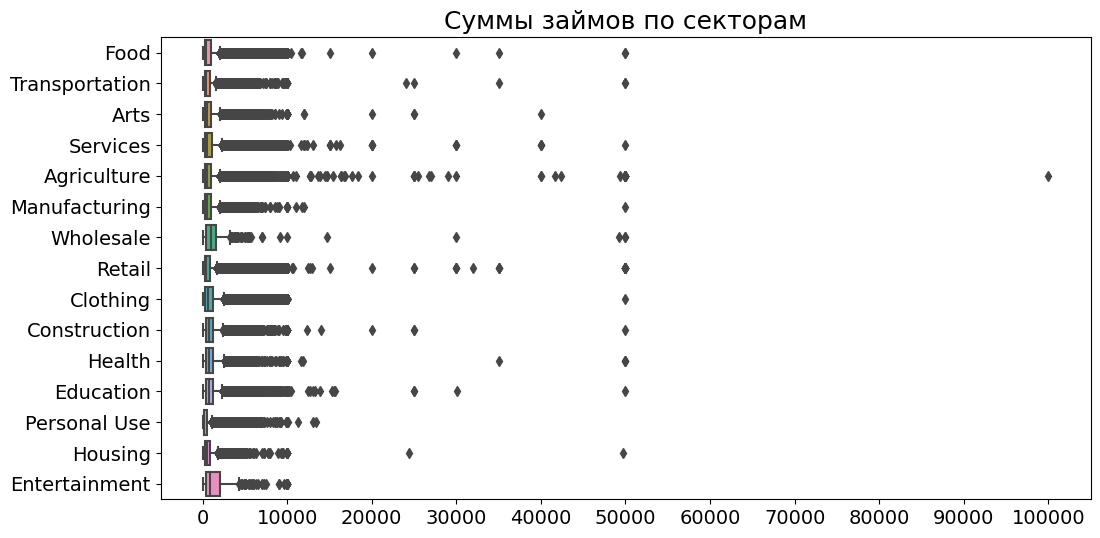

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", data=kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

Этот график называется "ящик с усами" (box pot). В данном случае у нас целая совокупность ящиков с усами. Левая граница ящика - первый квантиль (25% значений), правая граница - третий квантиль (75% значений). В свою очередь "усы" (линии по бокам от ящика) имеют длину в полтора интерквартильных размаха. Все значения за пределом этого интервала считаются выбросами.

Давайте взглянем на средние и медианные значения суммы займа по секторам:

In [ ]:
sector_mean_median = kiva_loans\
    .groupby(['sector'])['loan_amount']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)

sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,975.0,1582.059801
Entertainment,900.0,1698.335467
Education,725.0,994.748874
Health,725.0,1071.300975
Construction,700.0,1078.353041
Clothing,600.0,1137.414906
Services,550.0,1073.120142
Manufacturing,525.0,875.216505
Agriculture,500.0,799.362730


А также график, после того как мы избавимся от выбросов:

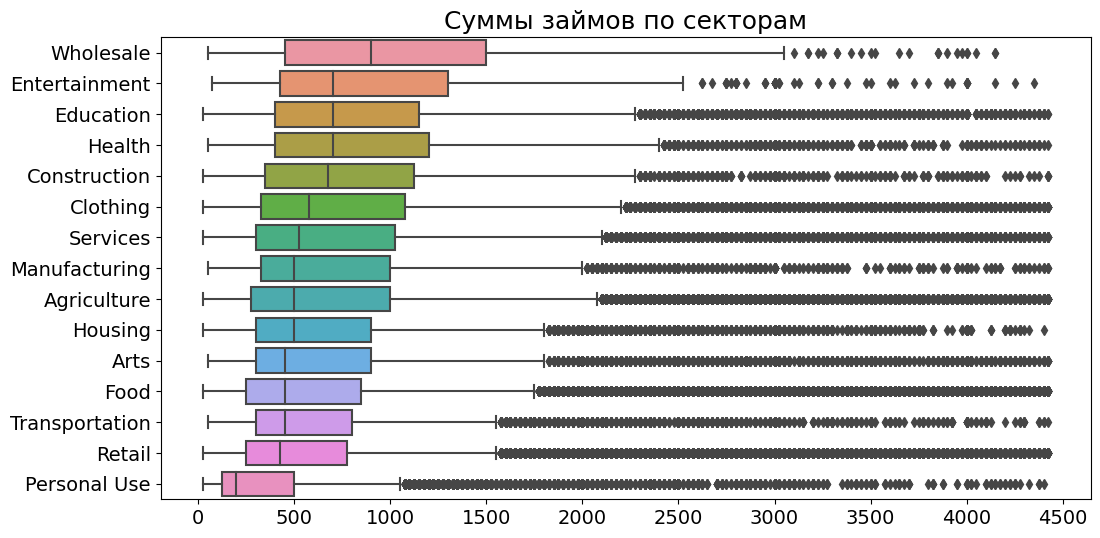

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", order=sort_order, data=kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

Прежде всего нужно отметить, что именно медиана дает робастную (устойчивую к выбросам) оценку центрального положения суммы займа. На графике медиана показана как черта внутри ящика.

Из графика становится ясно, что медиана суммы заявок на **Личные нужды** обладает наименьшим значением. Личные нужды включают предменты обихода и первой необходимости, обеспечение жилища энергией, теплом и водой. Именно эта группа заявок может свидетельствовать о случаях крайней нужды и бедности в различных странах.

На другой стороне графика сектора с самыми большими показателями медианы суммы займа: **Оптовая торговля**, требующая значительнх затрат на закупку, что вполне логично; **Образование** и **Здравоохранение**, а также **Сфера развлечений**.

## **Заключение и выводы**


 В этом модуле мы познакомились с основными принципами EDA, повторили основы визуализации, познакомились с более продвинутыми графиками и их эффективным использованием, а также разобрали основы работы с аномалиями - как их искать и обрабатывать.

1. **EDA**
- EDA нужен, чтобы сделать хороший анализ и быстро вникнуть в то, как структурирован датасет
- Для обнаружения взаимосвязей данных в Pandas используют методы:
   - для группировки — `.groupby()`
   - для сортировки — `.sort_values()`
   - для слияния таблиц — `.merge()`
- Если мы работаем с категориальными данными,  для визуализации могут пригодиться гистограммы (`plt.hist()`), вертикальные и горизонтальные столбчатые (`plt.bar()` и `plt.barh()`) и круговые диаграммы (`plt.pie()`)
- Если мы работаем с численными данными, для визуализации могут пригодиться линейный график (`plt.plot()`), диаграмма рассеяния (`plt.scatter()`), ящик с усами (`plt.boxplot()`) и тепловая карта (`seaborn.heatmap()`) (о ней мы расскажем в следующем модуле)


2. **Продвинутая визуализация данных**
- Чтобы построить несколько графиков на одном "полотне", нужно использовать параметр `subplots = (x, y)`
- Для обнаружения пропущенных значений нужно использовать библиотеку `missingno`
- Для детекции аномалий (выбросов) стоит использовать "ящик с усами" (нужно обращать внимание на точки за пределами "усов")

3. **Работа с выбросами и аномалиями**
- Выбросы могут возникать из-за качетвенных особенностей данных или ошибок в кодировании
- Для идентификации выбросов используют правило трех сигм и "ящик с усами".
- "Ящик с усами" можно строить от качественных данных, если в методе `sns.box_plot(x = "", y = "")` указать их как аргумент `y`